# 비지도학습 (Unsupervised Learning)
- 지도학습과 달리, 정답을 알지 못하는 경우 (즉, 종속변수가 없는 경우)
- 유사한 형태나 특성을 가지는 것들로 묶거나 변환하는 학습
- 지도학습을 하기 전, 더 좋은 성능을 발휘할 수 있도록 데이터 전처리 등에 많이 활용됨
- 비지도학습 종류
    1. 군집화 (Clustering)
    2. 주성분분석 (Principal component analysis; PCA)

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib 설정
plt.rc('font', family = 'AppleGothic')   # Mac
# plt.rc('font', family = 'Malgun Gothic')   # Windows
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

# 군집화 (Clustering)

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fw3F9P%2FbtqGdQLc4ye%2F0aKfpjetnOZMKZVs7hCXK1%2Fimg.png" width=600>

- 정답이 없는 것들을 그룹으로 묶는 것
- 그룹으로 묶어내는 것에서 지도학습의 분류(Classification)과 비슷하지만, 군집화에서는 실제 그룹을 알지 못함
- 예를 들어, 개와 고양이의 사진을 보여주고 어떤 것이 개이고 고양이인지 알려준 상태에서 학습한 후, 다른 고양이 사진을 보여주었을 때 이를 고양이로 분류하는 것은 Classification
- 반면, 개와 사람의 사진을 보여주고 어떤 것이 개인지 사람인지 알려주지 않은 상태에서 비슷한 것끼리 나누는 것이 Clustering
- Clustering 종류
    1. K-평균 클러스터링 (K-means Clustering)
    2. 계층적 클러스터링 (Heirarchical Clustering)

## 1. K-평균 클러스터링 (K-means Clustering)
- 가장 단순하면서도 강력한 클러스터링 방법
- 학습방법
    1. 클러스터 개수 k에 대한 중심점 생성
    2. 모든 데이터들의 중심점과에 거리를 계산
    3. 중심점과 가까운 것끼리 클러스터로 묶음
    4. 3번에서 생성된 k개의 클러스터마다 각각 새롭게 중심점 계산
    5. 2~4번 과정 반복 (더이상 클러스터가 바뀌지 않으면 종료)
- 단점: 클러스터의 개수를 사전에 결정해야함

### 예제 데이터 생성

In [2]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=100, centers=4, n_features=2, random_state=100)
points = pd.DataFrame(x, y).reset_index(drop=True)
points.columns = ["x", "y"]
points.head()

,x,y
0,0.322288,6.898540
1,5.190975,7.030129
2,5.118606,5.794904
3,-10.271085,-8.839641
4,-9.439324,-7.298630


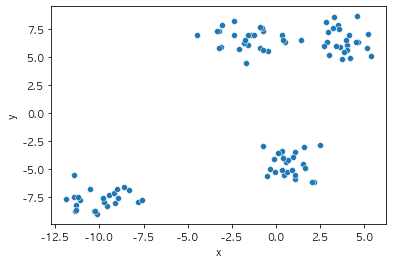

In [3]:
sns.scatterplot(x="x", y="y", data=points, palette="Set2")
plt.show()

In [4]:
from sklearn.cluster import KMeans 

# k-means clustering
kmeans = KMeans(n_clusters = 4)
kmeans.fit(points)

# 결과 확인
result_by_sklearn = points.copy()
result_by_sklearn["cluster"] = kmeans.labels_
result_by_sklearn.head()

,x,y,cluster
0,0.322288,6.898540,0
1,5.190975,7.030129,3
2,5.118606,5.794904,3
3,-10.271085,-8.839641,1
4,-9.439324,-7.298630,1


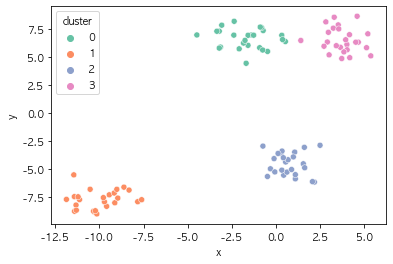

In [5]:
sns.scatterplot(x="x", y="y", hue="cluster", data=result_by_sklearn, palette="Set2")
plt.show()

### Iris 데이터에 적용

In [6]:
# 데이터 불러오기
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target
X.shape

(150, 2)

In [7]:
df = pd.DataFrame(X, columns=["Petal Length","Petal Width"])
df["Species"] = pd.Series(y)
df

,Petal Length,Petal Width,Species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


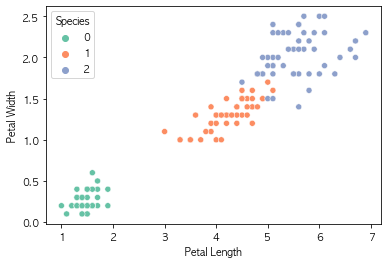

In [8]:
sns.scatterplot(x = "Petal Length", y = "Petal Width", hue = "Species", data = df, palette="Set2")
plt.show()

In [9]:
from sklearn.cluster import KMeans 

# k-means clustering 실행
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df.iloc[:, :2])

# 결과 확인
df_kmeans = df.copy()
df_kmeans["cluster"] = kmeans.labels_
df_kmeans.head()

,Petal Length,Petal Width,Species,cluster
0,1.4,0.2,0,1
1,1.4,0.2,0,1
2,1.3,0.2,0,1
3,1.5,0.2,0,1
4,1.4,0.2,0,1


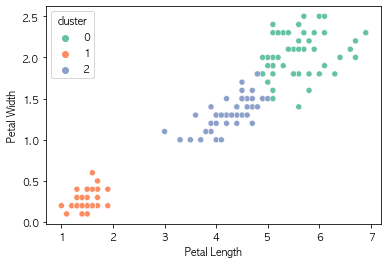

In [10]:
sns.scatterplot(x = "Petal Length", y = "Petal Width", hue = "cluster", data = df_kmeans, palette="Set2")
plt.show()

### kmeans의 한계

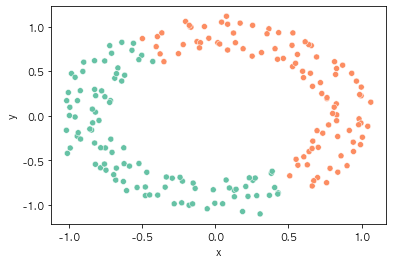

In [14]:
from sklearn.datasets import make_circles

x, y = make_circles(n_samples=200, noise=0.05)
circle = pd.DataFrame(x, y)
circle.columns = ["x", "y"]

kmeans = KMeans(n_clusters=2)
kmeans.fit(circle)
labels = kmeans.labels_

result_by_sklearn = circle.copy()
result_by_sklearn["cluster"] = kmeans.labels_
a = sns.scatterplot(x="x", y="y", hue="cluster", data=result_by_sklearn, palette="Set2")

plt.legend([],[], frameon=False);

## 2. 계층적 클러스터링 (Heirarchical Clustering)
- 거리가 가까운 것들끼리 순서대로 묶어나가는 클러스터링 방법
- 덴드로그램(Dendrogram)으로 클러스터로 묶여나가는 과정을 한 눈에 볼 수 있음
- 덴드로그램의 예시
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fq0XSX%2FbtqGewyIj5F%2FuCWmf0UJoEdEXn2uGqMfsk%2Fimg.png" width=400>
- 학습방법
    1. 모든 데이터 간의 거리를 계산한 거리 행렬을 생성
    2. 거리가 가장 가까운 것들끼리 클러스터로 묶음
    3. 다시 거리 행렬 계산 후 같은 과정 반복
- 거리의 종류
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbTzUeX%2FbtqGgj7e3dg%2FeTEEaa4nkKkvH3H0XtuOOk%2Fimg.png" width-400>

- 단점: 클러스터의 개수를 사전에 결정해야함

### 예제 데이터 생성

In [15]:
# 예제 데이터 생성
x, y = make_blobs(n_samples=20, centers=3, n_features=2, random_state=100)
label_list = range(1, 21)

### Single linkage

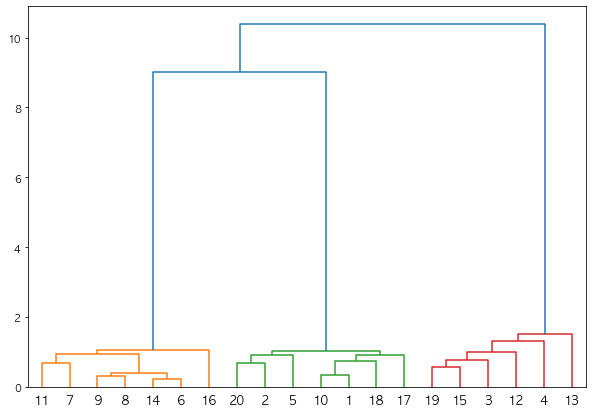

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Single linkage
linked = linkage(x, 'single')

plt.figure(figsize = (10, 7))
dendrogram(linked,
           orientation = 'top',
           labels = label_list,
           distance_sort = 'descending',
           show_leaf_counts = True)
plt.show()

### Copmplete linkage

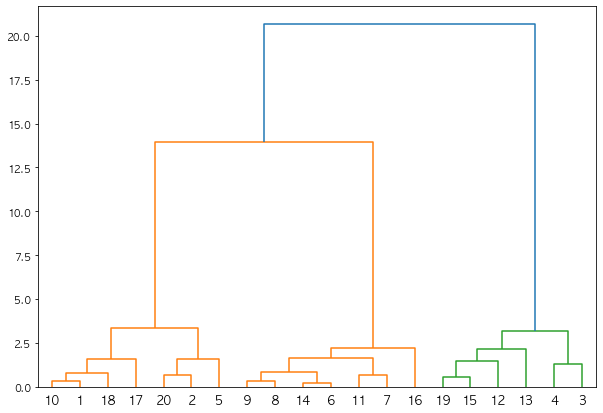

In [17]:
linked = linkage(x, 'complete')

plt.figure(figsize = (10, 7))
dendrogram(linked,
           orientation = 'top',
           labels = label_list,
           distance_sort = 'descending',
           show_leaf_counts = True)
plt.show()

### Average linkage

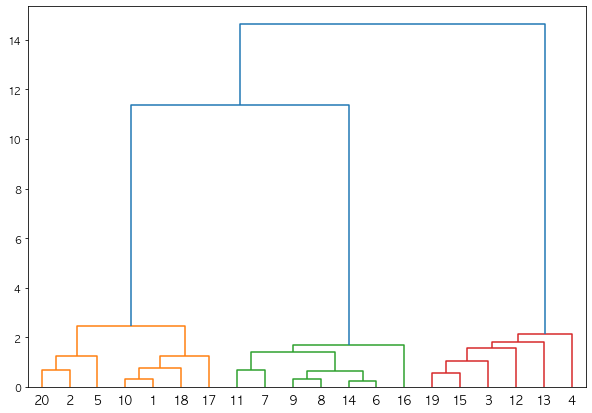

In [18]:
linked = linkage(x, 'average')

plt.figure(figsize = (10, 7))
dendrogram(linked,
           orientation = 'top',
           labels = label_list,
           distance_sort = 'descending',
           show_leaf_counts = True)
plt.show()

# 주성분 분석 (Principal component analysis; PCA)
- 고차원 데이터에서 차원을 줄여주는 방법으로 특히 독립변수들간에 서로 상관관계가 있을 때 이를 해결하는 방법 중 하나
- 분산이 가장 큰 방향(주성분)을 순서대로 찾고, 여기서 특정 임계치(분산설명도; PVE)를 만족하는 개수의 주성분만 선택하여 차원을 줄임
- 여기서 분산설명도(Proportion of variance explained; PVE)는 정해진 값은 없으나 80~90%정도를 많이 사용
- 가장 큰 특징은 각 주성분들끼리의 상관계수 = 0 (서로 수직)

In [20]:
# iris 데이터
X = iris.data[:, 2:]
X.shape

(150, 2)

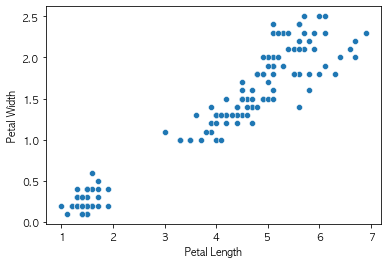

In [21]:
sns.scatterplot(x = "Petal Length", y = "Petal Width", data = df, palette="Set2")
plt.show()

### 주성분 방향 찾기

In [22]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

pca.components_

array([[ 0.92177769,  0.38771882],
       [-0.38771882,  0.92177769]])

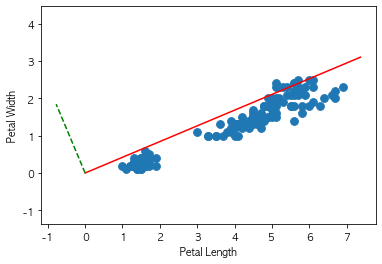

In [23]:
plt.scatter(X[:, 0], X[:, 1], s=60)

scale=8
plt.plot([0, pca.components_[0, 0]*scale], [0, pca.components_[0, 1]*scale], 'r-')

scale=2
plt.plot([0, pca.components_[1, 0]*scale], [0, pca.components_[1, 1]*scale], 'g--')

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.axis('equal')
plt.show()

### 주성분끼리는 상관계수 = 0 (서로 수직)

In [24]:
sum(pca.components_[:, 0] * pca.components_[:, 1])

0.0

### 주성분 계산

In [25]:
X_pca = pca.transform(X)
X_pca.shape

(150, 2)

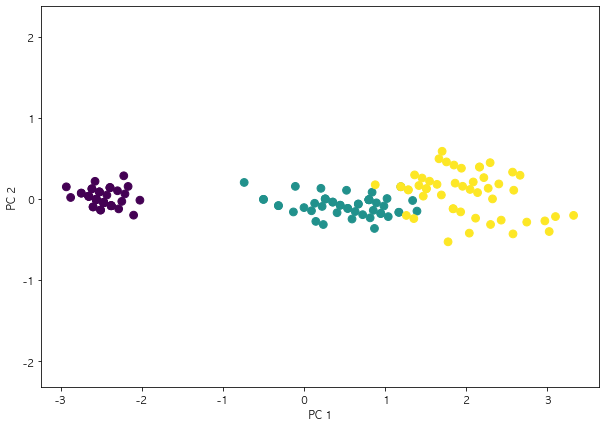

In [26]:
plt.figure(figsize = (10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, s=60)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.axis('equal')
plt.show()

### 4개 변수 모두 사용

In [27]:
# iris 데이터
X = iris.data
X.shape

(150, 4)

In [28]:
# 주성분 분석
pca = PCA(n_components = 2)
pca.fit(X)

pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [29]:
# 주성분 계산
X_pca = pca.transform(X)
X_pca.shape

(150, 2)

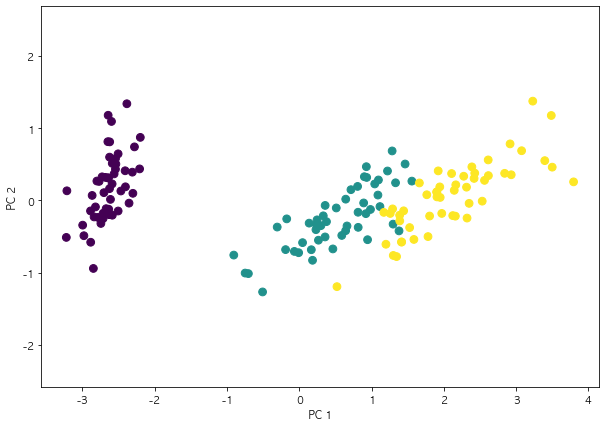

In [30]:
plt.figure(figsize = (10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, s=60)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.axis('equal')
plt.show()